<a href="https://colab.research.google.com/github/sc-mari-a/MN/blob/main/%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BB%D1%80_6_%2B_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 6 + 7. Кластеризація

Автор: Дорошенко Марія Андріївна ФІТ 4-11

**Була присутня на парі**

[Посилання на GitHub](https://github.com/sc-mari-a/MN/blob/main/%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BB%D1%80_6.ipynb)


## Завдання 1

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
# Завантаження датасету Iris
iris = load_iris()
x = iris.data

# Роздрукуємо перші 5 рядків датасету
pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


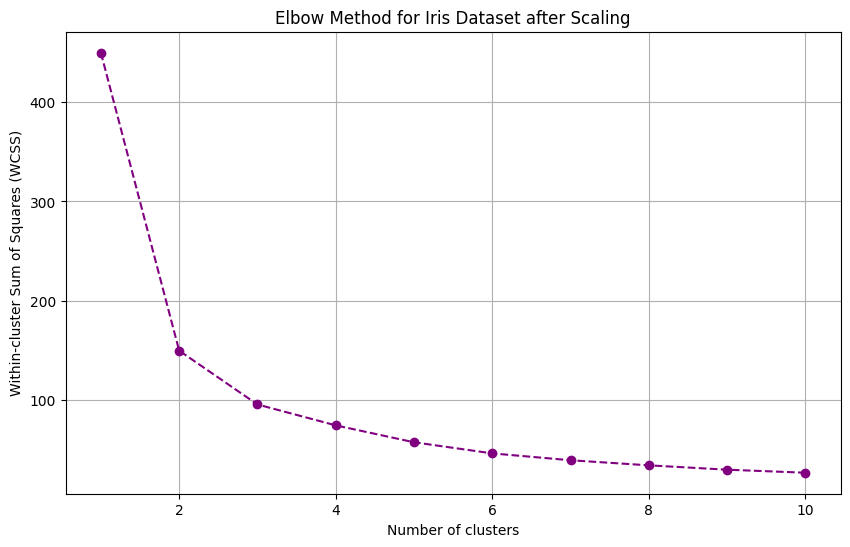

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Завантаження датасету Iris
iris = load_iris()
x = iris.data

# Роздрукуємо перші 5 рядків датасету
pd.DataFrame(x, columns=iris.feature_names).head()

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Вибір даних для кластеризації (ігноруємо перший стовпець)
X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]  # Вибираємо всі рядки і всі стовпці, крім першого

# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

# Візуалізація ліктевого графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method for Iris Dataset after Scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

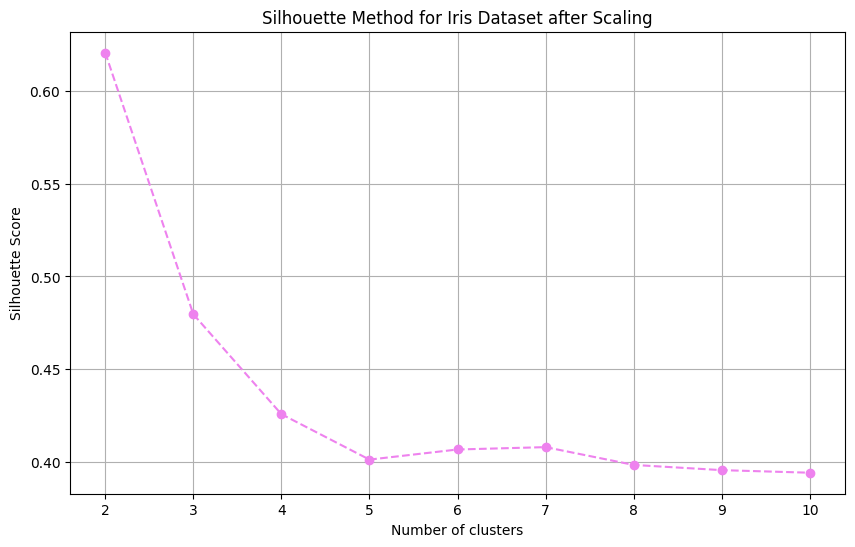

In [6]:
# Застосування методу силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for i in range(2, 11):  # Для методу силуетів потрібно мінімум 2 кластери
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='violet')
plt.title('Silhouette Method for Iris Dataset after Scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

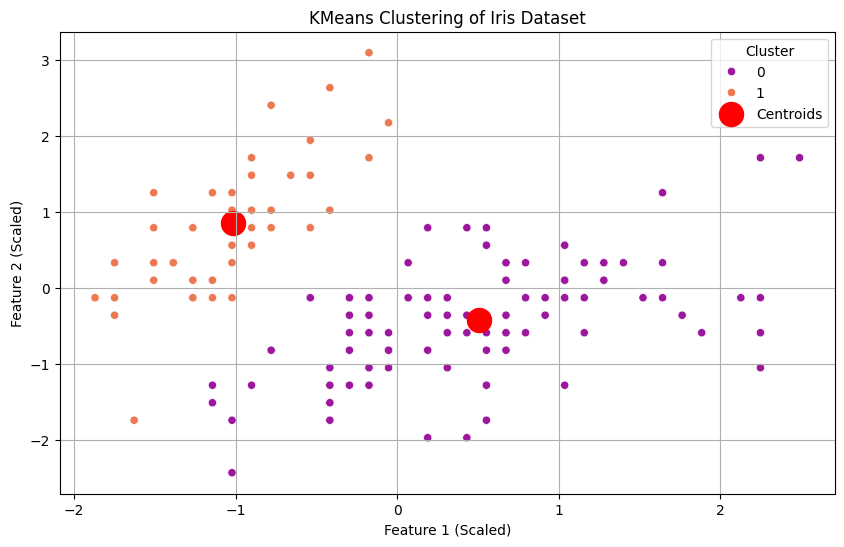

In [8]:
import seaborn as sns
# Використання KMeans для кластеризації
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='plasma', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Завдання 2

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files

In [10]:
# завантаження файлу
uploaded = files.upload()

Saving Student_data.csv to Student_data.csv


In [12]:
df = pd.read_csv('Student_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [13]:
# Виведення назв стовпців
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [15]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
df.isnull().sum()


Перевірка на пропущені значення:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [16]:
# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()


Перевірка наявності дублікатів:


np.int64(0)

In [17]:
# Описова статистика
print("\nОписова статистика:")
df.describe()


Описова статистика:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [18]:
# Перетворення категоріальних даних у числові (якщо потрібно)
#df = pd.get_dummies(df, drop_first=True)

# Вибір ознак (X) та цільової змінної (y)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. Random Forest

In [19]:
# Параметри для пошуку
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Модель
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# Оцінка на тестовій вибірці
y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525
Test accuracy for Random Forest: 0.9123173277661796


### 2. Logistic Regression

In [20]:
# Параметри для пошуку
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Модель
lr = LogisticRegression(random_state=42, max_iter=1000)

# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

# Оцінка на тестовій вибірці
y_pred_lr = grid_search_lr.predict(X_test)
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7710333137396963
Test accuracy for Logistic Regression: 0.7432150313152401


### 3. Support Vector Machine (SVM)

In [21]:
# Параметри для пошуку
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Модель
svm = SVC(random_state=42)

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

# Оцінка на тестовій вибірці
y_pred_svm = grid_search_svm.predict(X_test)
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8557147348707502
Test accuracy for SVM: 0.824634655532359


### Порівняння результатів.

In [22]:
# Виведення точності на тестовій вибірці для кожної моделі
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

# Виведення звіту про класифікацію для найкращої моделі
print("Classification report for the best model (Random Forest, Logistic Regression, or SVM):")
print(classification_report(y_test, y_pred_rf))  # Або y_pred_lr, або y_pred_svm, залежно від найкращої моделі

Test accuracy for Random Forest: 0.9123173277661796
Test accuracy for Logistic Regression: 0.7432150313152401
Test accuracy for SVM: 0.824634655532359
Classification report for the best model (Random Forest, Logistic Regression, or SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



Метод лігтя

In [ ]:
# Вибір числових стовпців для кластеризації
# Вибираємо стовпці, які є числовими і можуть впливати на кластеризацію
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Застосування ліктевого методу для визначення оптимальної кількості кластерів
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Візуалізація графіка ліктя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Метод силуетів

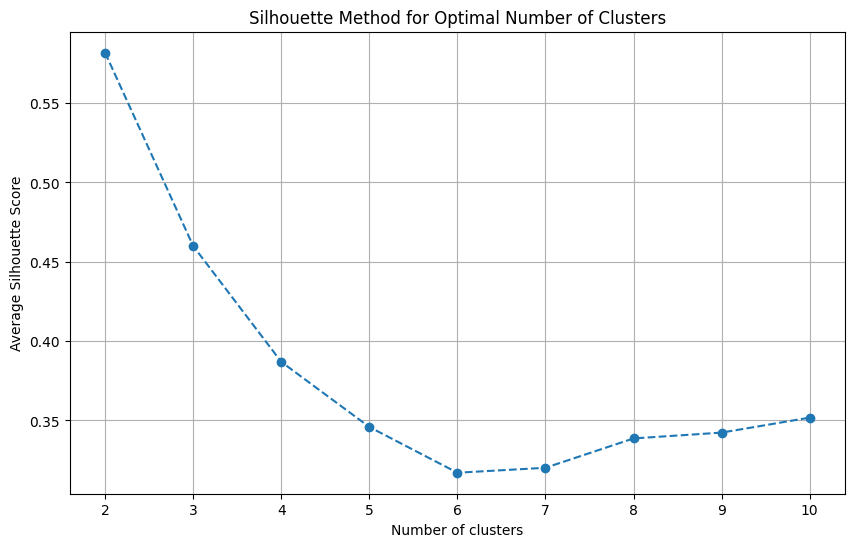

In [23]:
# Застосування методу силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for i in range(2, 11):  # Для методу силуетів потрібно мінімум 2 кластери
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()